# Linear regression on true hits

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [2]:
import operate_datasets
import model_visualisation
import model_evaluation

from utils import Parameters

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
DETECTOR_PARAMS = Parameters("SNDatLHC")
PATH_NUEL  = "~/snd_data/nue"
PATH_NUMU  = "~/snd_data/numu"
PATH_NUTAU = "~/snd_data/nutau"

# number of planes of the detector
NB_PLANE = len(DETECTOR_PARAMS.snd_params[DETECTOR_PARAMS.configuration]["TT_POSITIONS"])

In [4]:
import process_pickle

reidx_TT_df, reidx_y_full   = process_pickle.load_dataframes(DETECTOR_PARAMS, PATH_NUEL, PATH_NUMU, PATH_NUTAU)

# cut out extra events in the nuel dataset
reidx_TT_df ['nuel'] = reidx_TT_df ['nuel'][:10000]
reidx_y_full['nuel'] = reidx_y_full['nuel'][:10000]

merged_TT_df, merged_y_full = process_pickle.merge_events_arrays(reidx_TT_df, reidx_y_full)
merged_y_full = process_pickle.normalise_target_energy(merged_y_full)


Reading the tt_cleared.pkl & y_cleared.pkl files by chunk of CCDIS and NueEElastic
Before Reduction (file ~/snd_data/nue):
  TT_df  inelastic: 40000
  y_full inelastic: 40000
Before Reduction (file ~/snd_data/numu):
  TT_df  inelastic: 10000
  y_full inelastic: 10000
Before Reduction (file ~/snd_data/nutau):
  TT_df  inelastic: 10000
  y_full inelastic: 10000
After Reduction  :

Particle type: nuel
  TT_df : 10000
  y_full: 10000
Particle type: numu
  TT_df : 10000
  y_full: 10000
Particle type: nutau
  TT_df : 10000
  y_full: 10000

Combined TT_df : 30000
Combined y_full: 30000


In [5]:
# no muons yet ! 
# change signal digitization or the detector parameters
merged_TT_df.columns 

Index(['PX', 'PY', 'PZ', 'X', 'Y', 'Z', 'PdgCode'], dtype='object')

In [6]:
merged_TT_df['TrueHits'] = (0)

for i in range(merged_TT_df['X'].shape[0]):
    merged_TT_df['TrueHits'][i] = merged_TT_df['X'][i].shape[0]
    
true_hits_X = merged_TT_df['TrueHits'].to_numpy()

/home/fsergeev/anaconda3/envs/ship_tt/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'sum')

In [8]:
full_X = true_hits_X

In [9]:
X_train, y_train, _, _ = operate_datasets.split_dataset(full_X, full_y)

# no clipping for true hits
#X_train, y_train = dataset_clip(X_train, y_train, min_clip)

## Fit regression

In [10]:
from sklearn.linear_model import LinearRegression

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

reg_l2 = LinearRegression().fit(X_train, y_train) # positive=True ??? (update sklearn)
score_l2 = reg_l2.score(X_train, y_train)

print('L2: ', score_l2)

y_pred_l2 = reg_l2.predict(X_train)

L2:  0.0047386087144241085


## Visualise results

In [11]:
def plot_res_hist_custom(y_true, y_pred):
    resolution = np.divide(y_pred - y_true, y_true)
    
    fig, ax = plt.subplots(figsize=(8,6))

    plt.xlim(-2, 20)
    ax.hist(resolution.reshape(-1), bins = 1800)
    
    plt.xlabel(r'$(E_{reco} - E_{true})~/~E_{true}$')
    plt.ylabel('# particles')

    plt.show()

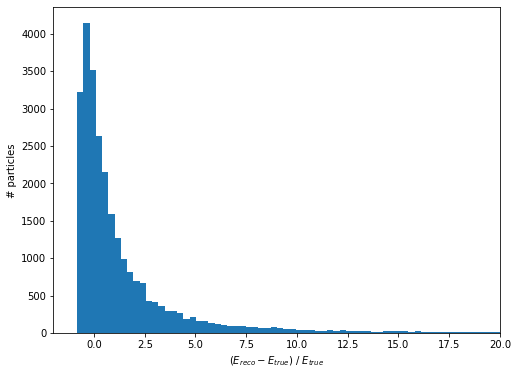

In [12]:
plot_res_hist_custom(y_train, y_pred_l2)

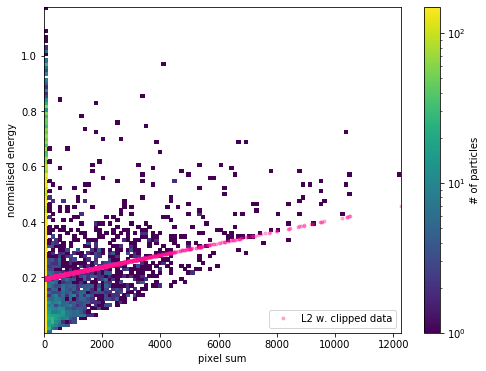

In [13]:
model_visualisation.plot_2d_energy_hist(X_train, y_train, y_pred_l2)

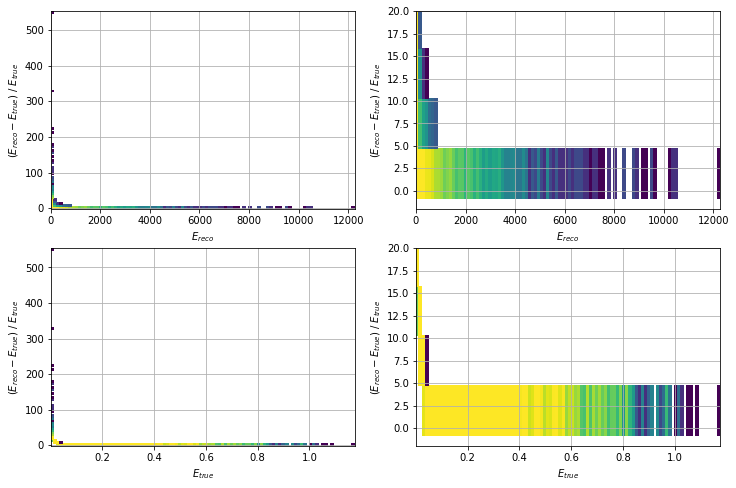

In [14]:
model_visualisation.plot_res_vs_energy(X_train, y_train, y_pred_l2) 